# Lesson 18 선형자료구조 (20.08.15)

In [1]:
from IPython.display import Image

## 18-1 동적 배열

일반적으로 배열은 처음에 배열을 선언할 때 배열의 크기가 지정되어 있기 때문에 자료의 개수가 변함에 따라 많은 시간이 소요된다.
동적 배열은 자료 구조의 크기 등의 변화에 좀 더 유연하게 대처하는 특징을 가진다.
* 배열의 크기를 변경하는 resize()연산이 가능하고 이는, O(N)의 시간이 걸림 (새 배열을 할당하고 기존 자료를 복사하기 때문에)
* 주어진 원소를 배열의 맨 끝에 추가함으로써 크기를 1 늘리는 append()연산을 지원한다. 이는 O(1)의 시간이 걸림.
* 대부분의 언어는 동적 배열을 표준 라이브러리에서 제공한다.
> Append()의 수행을 상수 시간에 구현할 수 있는 이유 : 메모리를 할당받을 때 배열의 크기가 커질 때를 대비하여 여유분의 메모리를 미리 할당 받아두기 때문이다. **파이썬의 경우 list는 동적배열로 구현된다**

참고: http://pythonstudy.xyz/python/article/12-%EC%BB%AC%EB%A0%89%EC%85%98--List


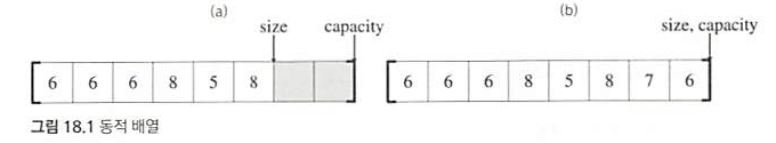

In [7]:
Image("C:/Users/study gil/Documents/1.jpg")

## 18-2 연결리스트

일반적인 배열 원소들의 순서를 유지하면서 원소를 삽입하거나 임의의 위치에서 원소를 삭제하는 것은 **O(N)** 의 시간이 걸린다. *연결리스트* 특정 위치에서 삽입과 삭제를 상수 시간에 할 수 있게 해주며, 다음과 같은 특징을 가진다.

* 메모리의 연속된 위치에 각 원소가 저장되어 있는 일반적인 배열과는 달리, 여기저기 흩어져 있고, 포인터로 그 순서를 구성하고 있다.
* 원소, 포인터의 집합들을 리스트의 노드(Node)라고 부른다.
* 특정 위치의 원소를 찾기 위해서는 하나씩 포인트를 따라가며 찾게 되고 길이에 선형 비례하는 시간이 드는 단점이 있다.
* 반면, 노드의 순서를 유지면서 노드를 삽입하거나, 기존 노드를 삭제하는 것은 상수의 시간이 든다.

> 일반적인 배열과 달리 포인트만 변경하면 간단하게 변경이 가능하기에 연결리스트에서의 삽입과 삭제는 매우 간단한 작업으로 이루어 질 수 있
다.

참고 : https://comdoc.tistory.com/entry/3-%EC%97%B0%EA%B2%B0-%EB%A6%AC%EC%8A%A4%ED%8A%B8Linked-list-ADT-%ED%8C%8C%EC%9D%B4%EC%8D%AC

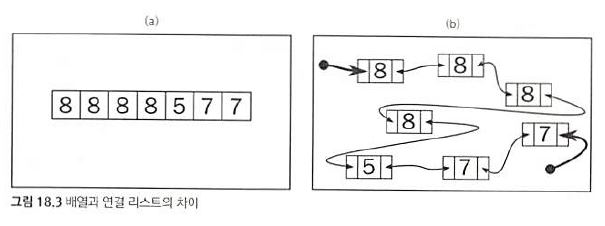

In [6]:
Image("C:/Users/study gil/Documents/2.jpg")

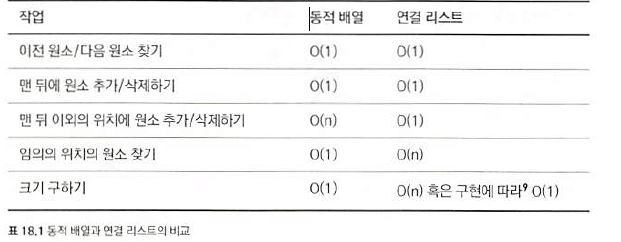

In [8]:
Image("C:/Users/study gil/Documents/3.jpg")

## 18-3 연습문제 : 조세푸스
조세푸스의 문제는 다음과 같다.
1. 총 N의 명의 병사가 원형으로 앉아있다.
2. 첫 번째 사람(1)이 자살하면, 시계방향으로 K번째 살아있는 사람이 자살한다.
3. 두 명이 남았을 때 항복한다고 한다. 조세푸스가 그 두명 중 하나가 되기 위해서는 첫 번째 병사로부터 몇 자리 떨어진 곳에 있어야 하는지 출력해야 한다
4. 입력 데이터는 N,K이 주어지고 살아남은 병사의 번호를 오름차순으로 반환한다.

## 영길 

In [5]:
def josephus(n,k):
    survivors = [i for i in range(2,n+1)]
    temp = k-1
    # temp는 죽는 사람의 index
    # 죽는 사람 포함해서 k번째 이고, pop해서 없애기 때문에 k-1번째 
    while len(survivors) > 2 :
        if len(survivors) > temp:
            survivors.pop(temp)
            temp += k-1
        elif len(survivors) <= temp:
            temp = temp % len(survivors)
        # temp가 더 클 때는 %를 활용하여 survivors 배열을 붙이는 효과를 넣음
            survivors.pop(temp)
            temp += k-1
    return survivors    

In [6]:
# Sample data 
josephus(100000,123)

[7147, 65459]

In [1]:
a = [1,2,3,4,5]
a.pop(2)
a

[1, 2, 4, 5]

## 예찬

In [16]:
import numpy as np

def solution(n,k):
    total = n
    people = np.arange(n) + 1
    kill = 1
    while n > 2:
        people[kill-1] = -1
        n -= 1
#         print(kill)
        pass_ = 0
        check = kill
        while pass_ != k:
            check += 1
            if check > total:
                check -= total
            
            if people[check-1] != -1:
                pass_ += 1
            
        kill = check
    
    return people[people != -1]

In [17]:
solution(6,3)

array([3, 5])

In [18]:
solution(40,3)

array([11, 26])

## 종현

In [ ]:
# Josephus p.620
C = int(input())
for _ in range(C):
    N, K = map(int, input().split())
    if N == 2:
        print(1, 2)
    J = [i for i in range(2, N+1)]    # J = [2, ..., N]
    
    while len(J) > 2:     # 두 명이 남을 때까지 실시
        if len(J) >= K:  # 리스트의 길이가 K 이상인 경우
            idx = K-1
            Left = J[:idx]     # idx 이전까지의 리스트
            Right = J[idx+1:]  # idx 이후의 리스트
            J.pop(idx)         # J[idx]를 pop
            J = Right + Left   # J를 새로 생성
        else:                       # 리스트의 길이가 K 미만인 경우
            idx = K % len(J) - 1    #
            if idx == -1:
                idx = len(J) - 1
            Left = J[:idx]
            Right = J[idx+1:]
            J.pop(idx)
            J = Right + Left
    print(*sorted(J))

# 수정

In [ ]:
def josephus(n, k):
    survivors = [i for i in range(1,n+1)]
    idx = 0  # 코딩 인덱스
    
    while len(survivors) > 2:
        #idx += k # k번째 사람 자살
        
        if idx > len(survivors)-1 : # 인덱스가 n을 넘어가면 n(배열의 길이)만큼 빼준다.
            idx -= len(survivors) 
            
        del survivors[idx]
        
        idx +=k-1
        
    return survivors

%time
remains = josephus(5,50)  # 오류 해결하기! 만약 3명인데 6번째 구하는 경우도 돌아가도록.
remains2 = josephus(3,6)   # 오류 해결하기! 만약 6명인데 3번째 구하는 경우도 돌아가도록.
print(remains, remains2)

# Lesson 19 큐와 스택, 데크

## 19-1 큐와 스택, 데크


큐와 스택, 데크는 일렬로 늘어선 가은 형태의 자료를 저장한다. 각각은 자료의 서로 다른 구조를 가지고 있다. 이들의 차이 점은 **어느 쪽 끝에서 자료를 넣고 뺄 수 있는가**이다.

1. 큐(Queue) : 한쪽 끝에서 자료를 넣고 반대 쪽 끝에서 자료를 꺼낼 수 있다. 이러한 속성에 따라 가장 먼저 들어간 자료가 가장 먼저 꺼내지게 된다. *선입선출 : FIFO* 
2. 스택(Stack) : 한쪽 끝에서만 자료를 넣고 뺄 수 있다. 따라서 가장 늦게 들어간 자료가 가장 먼저 나오게 되고, 이를 *후입선출 : LIFO*라고 한다.
3. 데크(Dequeue) : 양쪽 끝에서 자료를 넣고 뺄 수 있다. 따라서 데크는 스택과 큐 모두를 구현할 수 있다. 
> 컴퓨터 내부적으로는 **스택**을 사용해 함수들의 문맥(Context)를 관리한다. 예를 들어 함수 호출이 끝나고 이전 함수로 돌아갈 때, 이 함수 바로 이전의 함수로 돌아가게 된다. 

> 사실 기본적인 배열이나 연결 리스트를 이용하여 쉽게 구현할 수 있으나, 구조의 형태에 이름을 붙였다는데 그 의의가 있다. 따라서 개발자 간의 의사소통이 쉬워 지고, 다른 알고리즘을 구현하는 도구로 활용된다. 

### 표준 라이브러리의 구현
자료구조에 자료를 넣는 작업은 푸시(push), 자료를 꺼내는 작업은 팝(pop)이라고 한다. 그리고 이들 연산은 모두 상수시간에 이루어져야 한다. 스택과 큐, 데크는 아주 기본적인 자료 구조이기에 모든 언어의 표준 라이브러리에서 구현체를 제공한다. 

파이썬에서의 구현 : https://www.fun-coding.org/DS&AL1-5.html

## 19-2 짝이 맞지 않는 괄호 
문제는 둥근 괄호 (), 중괄호 {}, 대괄호 []로 구성되어 있다. 괄호들이 다음과 같은 성질을 모두 만족할 때 수식이 **짝이 맞는다**라고 표현한다.
1. 모든 괄호는 해당하는 짝이 있어야 한다. (), {}, []
2. 모든 괄호 쌍은 먼저 열린 뒤 닫힌다.
3. 한 괄호 쌍이 다른 괄호쌍과 서로 교차하면 안된다. 예를 들어 [(])는 짝이 맞지 않는다.
이러한 조건들을 이용하여, 주어진 input에 짝이맞는 지에 대한 여부를 결과로 구현해야한다.

## 영길

In [6]:
import queue
def wellMatched(formula):
    opening = ['(','{','[']; closing = [')','}',']']
    stack = queue.LifoQueue() 
    # Last in First Out queue로 스택과 동일하다. 
    for i in range(len(formula)):
        # 여는 괄호라면 스택에 집어 넣는다.
        if formula[i] in opening :
            stack.put(formula[i])
        else:
            # 여는 괄호가 아닌 경우
            # 스택이 비어 있는 경우에는 실패
            if stack.empty() :
                return False
            # 제일 마지막에 들어온 괄호와 매치가 되어야 함, 매치가 되면 stack에서 없앰(get하면 없어짐)
            if opening.index(stack.get()) != closing.index(formula[i]):
                return False
            
    # 다 매치가 되고 스택이 비어야지 매치가 성공
    return stack.empty()

In [9]:
a = '({}[(){}])'
b = '({[}])'
print(wellMatched(a)); print(wellMatched(b))

True
False


## 예찬

In [19]:
open_set = ['{','(','[']
close_set = ['}', ')', ']']

def solution(formula):
    open_ = []
    for i in formula:
#         print(i)
        if i in open_set:
            open_.append(i)
    
        else:
#             print("in :", open_)
            if (len(open_) > 0) & (open_set[close_set.index(i)] == open_[-1]):
                open_.pop()
                
            else:
                return False
    
    return True

In [20]:
open_set.index("{")

0

In [21]:
test_1 = '({[}])'
test_2 = '({}[(){}])'
test_3 = '()()'

In [22]:
solution(test_1)

False

In [23]:
solution(test_2)

True

In [24]:
solution(test_3)

True

## 종현

In [ ]:
# BRACKETS2, p.633
pairs = [ '()', '{}', '[]']
C = int(input())
for _ in range(C):
    brackets = input()
    n = len(brackets)
    if (n % 2 != 0) or len(brackets) == 0:    # 입력된 문자열의 길이가 2의 배수가 아닌 경우 'NO'출력.
        print('NO')
        break
    value = False     # default value: False.
    while True:
        for pair in pairs:    # (), {}, [] 중 하나라도 brackets에 있으면 value = True.
            if pair in brackets:
                value = True
        if value == False:    # value = False: brackets이 empty가 아닌 이상 'NO' 출력.
            if brackets == '':
                print('YES')
            else:
                print('NO')
            break
        for pair in pairs:    # value = True: brackets에 pair의 원소가 있는 경우 ''로 대체.
            brackets = brackets.replace(pair, '')
            value = False

## 수정

In [ ]:
# 파이썬 스택 개념을 이용해서

def solve(string):
    
    for i in string:
        if i in ["(","[","{"]:
            stack.append(i)
        
        # 닫는 괄호만 있는 경우
        elif len(stack)==0 and i in [')',']','}']:
            return "NO"
        
        # 닫는 괄호가 있기는 한데 앞에 짝꿍이 있는지 일일히 확인
        # pop 함수로 stack의 후입선출법 효과
        elif len(stack)>0 : 
            if i == ')':
                if stack[-1]=="(":
                    stack.pop(-1) # 조건에 맞으면 후입선출법
                else :
                    return "NO"
                
            elif i == "]":
                if stack[-1] == '[' :
                    stack.pop(-1)
                else :
                    return "NO"
                
            elif i == '}' :
                if stack[-1] == '{' :
                    stack.pop(-1)
                else :
                    return "NO"
       
    if len(stack)==0 :  # 다 비어있는 경우는 짝을 맞춰서 다 지워버린 경우와 동일.
        return "YES"
    else :
        return "NO"

In [ ]:
string = input()

solve(string)

In [ ]:
# 최종 함수
testCase = int(input("총 실행횟수?"))

for _ in range(testCase):
    string = input()
    stack=[]
    print(solve(string))
    
